In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import sqlite3

In [2]:
con = sqlite3.connect("data/okved_20230329.sqlite3")
cur = con.cursor()

In [3]:
def read(sql):
    return pd.read_sql(sql, con) # для удобства

sql = '''
    SELECT * FROM legal_entity
'''

comps = read(sql)

sql = '''
    SELECT * FROM supplier
'''

sups = read(sql)

sql = '''
    SELECT * FROM procurement
'''

proc = read(sql)

sql = '''
    SELECT * FROM product
'''

prod = read(sql)


In [4]:
comps = comps[~comps.address.isna()]

In [5]:
comps['emb'] = np.load('data/emb_np.npy', allow_pickle=True)
sups['emb'] = np.load('data/emb_np_sup.npy', allow_pickle=True)

In [6]:
comps_clean = comps[~comps['emb'].isna()]
sups_clean = sups[~sups['emb'].isna()]

In [42]:
proc

,id,start_price,object,method,name,customer_inn,executor_inn
0,32110356755,447993.0,Оказание услуг по организации и проведе...,СБ-АСТ: Закупка у единственного поставщика,Оказание услуг по организации и проведе...,5044000102,7736050003
1,32009458795,1183132.8,Оказание услуг газоснабжения,Закупка у единственного поставщика (подрядчика...,Оказание услуг газоснабжения,7729314745,7736050003
2,32008873158,622893.8,Оказание организационных услуг по празднованию...,СБ-АСТ: Закупка у единственного источника,Оказание организационных услуг по празднованию...,5044000102,7736050003
3,32110655889,54677830.0,Поставка нефтепродуктов,Закупка у единственного поставщика (подрядчика...,Поставка нефтепродуктов,5504037369,5504036333
4,32008994576,321300000.0,Поставка сжиженного углеводородного газа,Закупка у единственного поставщика (подрядчика...,Поставка сжиженного углеводородного газа,5504037369,5504036333
...,...,...,...,...,...,...,...
24802,32110588847,1000000.0,Оказание транспортно-экспедиционных услуг в ме...,Закупка у единственного поставщика (подрядчика...,Оказание транспортно-экспедиционных услуг в ме...,5047001270,7734535394
24803,32110382968,1000000.0,Оказание транспортно-экспедиционных услуг в ме...,Закупка у единственного поставщика (подрядчика...,Оказание транспортно-экспедиционных услуг в ме...,5047001270,7734535394
24804,32110232656,1000000.0,Оказание транспортно-экспедиционных услуг в ме...,Закупка у единственного поставщика (подрядчика...,Оказание транспортно-экспедиционных услуг в ме...,5047001270,7734535394
24805,32110123085,1000000.0,Оказание транспортно-экспедиционных услуг в ме...,Закупка у единственного поставщика (подрядчика...,Оказание транспортно-экспедиционных услуг в ме...,5047001270,7734535394


In [7]:
comps_clean

,inn,name,revenue,location,address,region,street,post,natural_representative_inn,legal_representative_inn,main_okved_code,emb
0,7706107510,"ПАО ""НК ""РОСНЕФТЬ""",8.000000e+12,ГОРОД МОСКВА,"115035, ГОРОД МОСКВА, НАБ. СОФИЙСКАЯ, Д.26/1",МОСКВА,НАБ СОФИЙСКАЯ,ГЛАВНЫЙ ИСПОЛНИТЕЛЬНЫЙ\nДИРЕКТОР,770370393938,None,06.10.1,"[0.0021982712, 0.0025602274, 0.004451619, 0.00..."
1,7736050003,"ПАО ""ГАЗПРОМ""",6.000000e+12,Г.Санкт-Петербург,"197229, Г.Санкт-Петербург, ВН.ТЕР.Г. МУНИЦИПАЛ...",САНКТ-ПЕТЕРБУРГ,ПР-КТ ЛАХТИНСКИЙ,ПРЕДСЕДАТЕЛЬ ПРАВЛЕНИЯ,782506133697,None,46.71,"[0.005155264, 0.0012874127, 0.0076143104, 0.00..."
3,7708004767,"ПАО ""ЛУКОЙЛ""",2.000000e+12,ГОРОД МОСКВА,"101000, ГОРОД МОСКВА, Б-Р СРЕТЕНСКИЙ, Д.11",МОСКВА,Б-Р СРЕТЕНСКИЙ,ПРЕЗИДЕНТ,770300105713,None,71.12.3,"[0.0027381002, 0.0022334736, 0.004270247, 0.00..."
4,7708503727,"ОАО ""РЖД""",2.000000e+12,Г.Москва,"107174, Г.Москва, ВН.ТЕР.Г. МУНИЦИПАЛЬНЫЙ ОКРУ...",МОСКВА,УЛ НОВАЯ БАСМАННАЯ,ГЕНЕРАЛЬНЫЙ ДИРЕКТОР-\nПРЕДСЕДАТЕЛЬ ПРАВЛЕНИЯ,781306504007,None,49.20,"[0.0025980012, 0.0022231229, 0.004554158, 0.00..."
6,7825706086,"ООО ""АГРОТОРГ""",2.000000e+12,ГОРОД САНКТ-ПЕТЕРБУРГ,"191025, ГОРОД САНКТ-ПЕТЕРБУРГ, ПР-КТ НЕВСКИЙ, ...",САНКТ-ПЕТЕРБУРГ,ПР-КТ НЕВСКИЙ,None,None,7728632689,47.19,"[0.0045283777, 0.0014587305, 0.0014842371, 0.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...
66796,7721045804,ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ АВТОНОМНОЕ ОБРАЗОВ...,NaN,"109443, Г.Москва, ПР-КТ ВОЛГОГРАДСКИЙ, дом Д.9...","109443, Г.Москва, ПР-КТ ВОЛГОГРАДСКИЙ, дом Д.9...",None,None,None,None,None,None,"[0.0017474543, 0.0030694979, 0.00827451, 0.005..."
66797,7802160210,ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕН...,NaN,"194291, ГОРОД САНКТ-ПЕТЕРБУРГ, ПР-КТ ЛУНАЧАРСК...","194291, ГОРОД САНКТ-ПЕТЕРБУРГ, ПР-КТ ЛУНАЧАРСК...",ГОРОД САНКТ-ПЕТЕРБУРГ,None,None,None,None,None,"[0.0038066802, 0.002574427, 0.003944216, 0.004..."
66804,5024076350,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""СПЕЦИАЛЬНОЕ КОНСТРУКТОРС...",NaN,"143432, Г.. КРАСНОГОРСК, УЛ. ИНСТИТУТСКАЯ, РП....","143432, Г.. КРАСНОГОРСК, УЛ. ИНСТИТУТСКАЯ, РП....",None,None,None,None,None,None,"[0.0027240096, 0.00618404, 0.001858598, 0.0020..."
66809,5321166230,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""АВТОБУСНЫЙ ПАРК""",NaN,"173020, ОБЛАСТЬ НОВГОРОДСКАЯ,ГОРОД ВЕЛИКИЙ НОВ...","173020, ОБЛАСТЬ НОВГОРОДСКАЯ,ГОРОД ВЕЛИКИЙ НОВ...",ОБЛАСТЬ НОВГОРОДСКАЯ,УЛИЦА ХУТЫНСКАЯ,None,None,None,None,"[0.004255943, 0.0007998545, 0.00044918526, 0.0..."


In [42]:
customer_name = []
executor_name = []
customer_emb = []
executor_emb = []
for i in range(len(proc)):
    inns = proc.iloc[i, :][['customer_inn', 'executor_inn']]
    c_inn = inns[0]
    e_inn = inns[1]
    c_info = comps_clean[comps_clean['inn'] == c_inn]
    e_info = comps_clean[comps_clean['inn'] == e_inn]
    if len(c_info) != 0 and\
       len(e_info) != 0:
        customer_name.append(c_info.name.values[0])
        customer_emb.append(c_info.emb.values[0])
        executor_name.append(e_info.name.values[0])
        executor_emb.append(e_info.emb.values[0])
        

In [43]:
comps_clean[comps_clean['inn'] == '7708503727']

,inn,name,revenue,location,address,region,street,post,natural_representative_inn,legal_representative_inn,main_okved_code,emb
4,7708503727,"ОАО ""РЖД""",2.000000e+12,Г.Москва,"107174, Г.Москва, ВН.ТЕР.Г. МУНИЦИПАЛЬНЫЙ ОКРУ...",МОСКВА,УЛ НОВАЯ БАСМАННАЯ,ГЕНЕРАЛЬНЫЙ ДИРЕКТОР-\nПРЕДСЕДАТЕЛЬ ПРАВЛЕНИЯ,781306504007,None,49.20,"[0.0025980012, 0.0022231229, 0.004554158, 0.00..."


In [138]:
import networkx as nx

In [156]:
from sklearn.preprocessing import LabelEncoder

In [154]:
names = customer_name + executor_name

In [157]:
le = LabelEncoder()
le.fit(names)

LabelEncoder()

In [158]:
customer_name = le.transform(customer_name)
executor_name = le.transform(executor_name)

In [159]:
G = nx.Graph()

In [160]:
for i in range(len(customer_name)):
    G.add_edges_from([(customer_name[i], executor_name[i])])
    G.nodes[customer_name[i]]['emb'] = customer_emb[i]
    G.nodes[executor_name[i]]['emb'] = executor_emb[i]
    G.nodes[customer_name[i]]['label'] = customer_name[i]
    G.nodes[executor_name[i]]['label'] = executor_name[i]

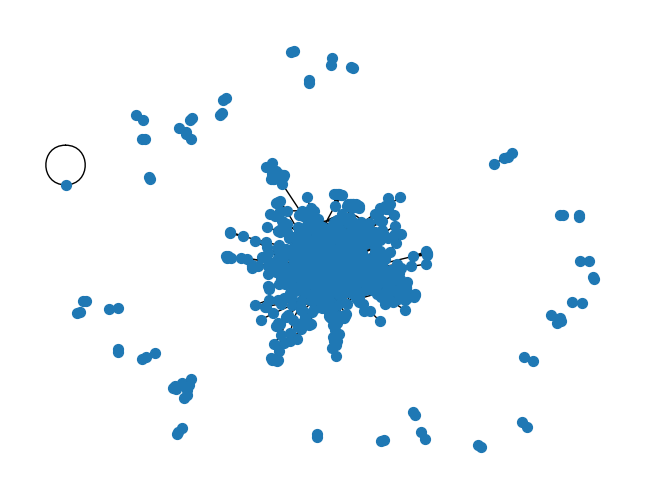

In [161]:
nx.draw(G, node_size = 50)

In [162]:
list(nx.connected_components(G))[0]

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 8,
 11,
 13,
 14,
 16,
 17,
 19,
 20,
 21,
 23,
 25,
 26,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 63,
 64,
 65,
 66,
 67,
 68,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 78,
 79,
 81,
 82,
 83,
 84,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 117,
 118,
 119,
 120,
 122,
 124,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 180,
 181,
 182,
 183,
 184,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,


In [163]:
c_info.emb.values[0]

array([5.8517787e-03, 4.0811249e-03, 3.7851329e-03, ..., 2.2246967e-07,
       7.6964119e-07, 1.6738442e-06], dtype=float32)

In [164]:
g = G.subgraph(list(nx.connected_components(G))[0])

In [165]:
DG = nx.DiGraph()
DG.add_edges_from(g.edges())

In [166]:
for i in g.nodes():
    DG.nodes[i]['emb'] = g.nodes[i]['emb']
    DG.nodes[i]['label'] = g.nodes[i]['label']

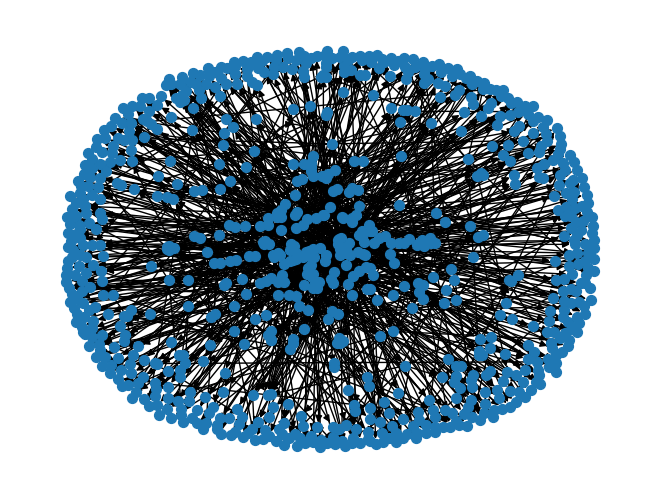

In [167]:
nx.draw(DG, node_size = 50)

In [168]:
len(DG)

852

In [169]:
len(DG.edges())

1217

In [170]:
DG.nodes(data = True)

NodeDataView({889: {'emb': array([2.4421329e-03, 2.2525967e-03, 4.8440960e-03, ..., 6.9359754e-05,
       5.9674380e-07, 1.2162166e-06], dtype=float32), 'label': 889}, 773: {'emb': array([5.1552639e-03, 1.2874127e-03, 7.6143104e-03, ..., 5.7174702e-06,
       2.0313928e-07, 4.5510191e-03], dtype=float32), 'label': 773}, 135: {'emb': array([2.2315169e-03, 4.0716040e-03, 4.9995617e-03, ..., 5.1501567e-05,
       3.5211181e-07, 3.9423222e-07], dtype=float32), 'label': 135}, 162: {'emb': array([5.4243957e-03, 1.8515552e-03, 3.3196523e-03, ..., 6.1614759e-05,
       7.0505240e-07, 1.5142941e-03], dtype=float32), 'label': 162}, 47: {'emb': array([1.7986865e-03, 3.3682375e-03, 8.4835645e-03, ..., 4.0253275e-05,
       1.4922766e-07, 4.4522199e-08], dtype=float32), 'label': 47}, 776: {'emb': array([1.2864500e-03, 9.8041608e-04, 2.3388972e-03, ..., 1.1868868e-06,
       6.1126499e-08, 1.1269269e-07], dtype=float32), 'label': 776}, 230: {'emb': array([5.3459645e-04, 2.3612767e-02, 6.8285578e-04,

In [171]:
import dgl

In [172]:
g1 = dgl.from_networkx(DG, node_attrs=['emb', 'label'])

In [173]:
len(g1.ndata['emb'])

852

In [174]:
g1.num_nodes

<bound method DGLGraph.num_nodes of Graph(num_nodes=852, num_edges=1217,
      ndata_schemes={'emb': Scheme(shape=(2000,), dtype=torch.float32), 'label': Scheme(shape=(), dtype=torch.int32)}
      edata_schemes={})>

In [175]:
g1.ndata['emb'][0]

tensor([7.2311e-03, 2.2477e-03, 1.2390e-02,  ..., 8.7761e-06, 5.1598e-07,
        5.9595e-04])

In [178]:
from dgl.data.utils import save_graphs
save_graphs("data/graph.bin", g1)

In [179]:
from dgl.data.utils import load_graphs
glist, label_dict = load_graphs("data/graph.bin")

In [181]:
glist[0]

Graph(num_nodes=852, num_edges=1217,
      ndata_schemes={'emb': Scheme(shape=(2000,), dtype=torch.float32), 'label': Scheme(shape=(), dtype=torch.int32)}
      edata_schemes={})

In [182]:
import pickle

In [184]:
filename = 'data/encoder.sav'
pickle.dump(le, open(filename, 'wb'))